# EEG ChildMind Dataset Analysis

This notebook takes data from ChildMind and finds correlations between neural spectral parameters ratio measures and age.

In [1]:
%matplotlib inline

import csv

import pandas as pd
from numpy.linalg import LinAlgError
from scipy.stats import spearmanr

import mne

import seaborn as sns
sns.set_context('talk')

In [2]:
# Import custom project code
import sys
sys.path.append('../bratios')
from ratios import *
from analysis import *
from settings import *
from plot import *
from paths import DATA_PATHS as dp
from paths import FIGS_PATHS as fp

In [3]:
# Settings
SAVE_FIG = False
PROCESS_DATA = False

## Import Data

Here we import power spectra and select channel clusters from the EEG montage that was used.

In [4]:
# Read datafile with dataset information
data = pd.read_csv(dp.make_file_path(dp.eeg_meta, 'MIPDB_PublicFile', 'csv'))

In [5]:
# Read in list of channel names that are kept in reduced 111 montage
with open(dp.make_file_path(dp.eeg_meta, 'chans111', 'csv'), 'r') as csv_file:
    reader = csv.reader(csv_file)
    ch_labels = list(reader)[0]
    
# Read montage, reduced to 111 channel selection
montage = mne.channels.read_montage('GSN-HydroCel-129', ch_names=ch_labels)

In [6]:
# Get the list of all channels
all_chans = mne.pick_channels(montage.ch_names, [])

In [7]:
# Define a channel cluster of interest
ch_cluster_parietal = ['E71', 'E76', 'E70', 'E75', 'E83']
ch_cluster_central = ['E7','E106', 'E31', 'Cz', 'E80']
ch_cluster_frontal = ['E15', 'E18', 'E16', 'E10', 'E11']

# Get the indices of the channels of interest
ch_inds_parietal = mne.pick_channels(montage.ch_names, ch_cluster_parietal)
ch_inds_central = mne.pick_channels(montage.ch_names, ch_cluster_central)
ch_inds_frontal = mne.pick_channels(montage.ch_names, ch_cluster_frontal)

In [8]:
# Get a list of all channels of interest
ch_interest = ch_cluster_central + ch_cluster_frontal + ch_cluster_parietal
montage.selection = ch_interest

# Correlation between Parameters and Theta Beta Ratio

Below we run our data through a process which returns a dataframe where each row is a specific channel from a subject. 

Columns include spectral parameters for alpha, beta, and theta oscillations as well as theta/beta ratio, theta/alpha ratio, and alpha/beta ratio.

In [9]:
# Create the dataframe of all the data
if PROCESS_DATA:
    
    # Load and process the data
    df = get_all_data(data, all_chans)
    # Save out the contructed dataframe
    df.to_csv(dp.make_file_path(dp.eeg_outputs, 'spectral_measures_dataframe', 'csv'))

else:
    # Reload the dataframe
    df = pd.read_csv(dp.make_file_path(dp.eeg_outputs, 'spectral_measures_dataframe', 'csv'))

Using the function param_ratio_corr() we can find the correlations between a ratio measure and all spectral parameters. We can even sub select channels.

Below, we display heatmaps where the value in each cell represents the spearman correlation between the given ratio and a given location and a given spectral feature.

## TBR: Theta Beta Ratio

### Global

In [10]:
tbr_per, tbr_ap = param_ratio_corr(df, "TBR", all_chans, func=nan_corr_spearman)
print_aperiodic_correlation("TBR", tbr_ap)

The corr of TBR to Exp is 0.73
The corr of TBR to Off is 0.67
The corr of TBR to Age is -0.61


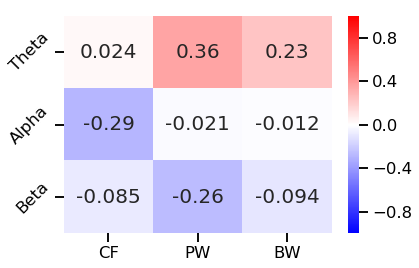

In [11]:
plot_param_ratio_corr(tbr_per, y_labels=["Theta", "Alpha", "Beta"],
                      save_fig=SAVE_FIG, file_name="Global_TBR_corrs")
plot_param_ratio_corr_exp(tbr_ap, show=False, save_fig=SAVE_FIG, file_name="Global_TBR_corrs")

### Frontal

In [12]:
tbr_per, tbr_ap = param_ratio_corr(df, "TBR", ch_inds_frontal, func=nan_corr_spearman)
print_aperiodic_correlation("TBR", tbr_ap)

The corr of TBR to Exp is 0.71
The corr of TBR to Off is 0.65
The corr of TBR to Age is -0.57


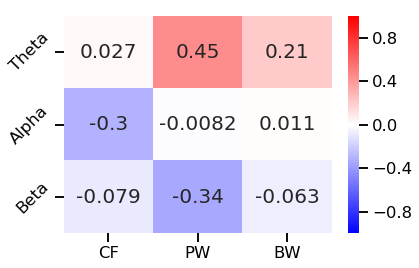

In [13]:
plot_param_ratio_corr(tbr_per, y_labels=["Theta","Alpha","Beta" ],
                      save_fig=SAVE_FIG, file_name="Frontal_TBR_corrs")
plot_param_ratio_corr_exp(tbr_ap, show=False, save_fig=SAVE_FIG, file_name="Frontal_TBR_corrs")

### Central

In [14]:
tbr_per, tbr_ap = param_ratio_corr(df, "TBR", ch_inds_central, func=nan_corr_spearman)
print_aperiodic_correlation("TBR", tbr_ap)

The corr of TBR to Exp is 0.79
The corr of TBR to Off is 0.73
The corr of TBR to Age is -0.65


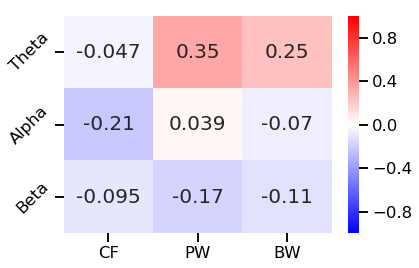

In [15]:
plot_param_ratio_corr(tbr_per, tbr_ap, y_labels=["Theta","Alpha","Beta" ],
                      save_fig=SAVE_FIG, file_name="Central_TBR_corrs")
plot_param_ratio_corr_exp(tbr_ap, show=False, save_fig=SAVE_FIG, file_name="Central_TBR_corrs")

### Parietal

In [16]:
tbr_per, tbr_ap = param_ratio_corr(df, "TBR", ch_inds_parietal, func=nan_corr_spearman)
print_aperiodic_correlation("TBR", tbr_ap)

The corr of TBR to Exp is 0.74
The corr of TBR to Off is 0.73
The corr of TBR to Age is -0.63


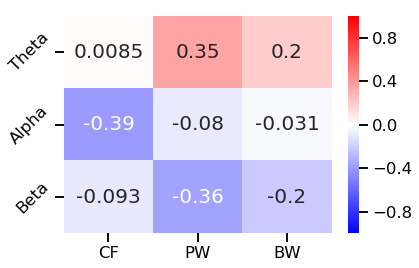

In [17]:
plot_param_ratio_corr(tbr_per, tbr_ap, y_labels=["Theta","Alpha","Beta" ],
                      save_fig=SAVE_FIG, file_name="Parietal_TBR_corrs")
plot_param_ratio_corr_exp(tbr_ap, show=False, save_fig=SAVE_FIG, file_name="Parietal_TBR_corrs")

## TAR: Theta Alpha Ratio

### Global

In [18]:
tar_per, tar_ap = param_ratio_corr(df, "TAR", all_chans, func=nan_corr_spearman)
print_aperiodic_correlation("TAR", tar_ap)

The corr of TAR to Exp is 0.19
The corr of TAR to Off is 0.17
The corr of TAR to Age is -0.33


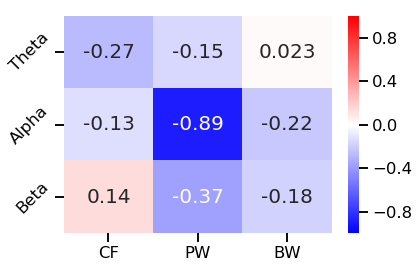

In [19]:
plot_param_ratio_corr(tar_per, tar_ap, y_labels=["Theta","Alpha","Beta" ],
                      save_fig=SAVE_FIG, file_name="Global_TAR_corrs")
plot_param_ratio_corr_exp(tar_ap, show=False, save_fig=SAVE_FIG, file_name="Global_TAR_corrs")

### Frontal

In [20]:
tar_per, tar_ap = param_ratio_corr(df, "TAR", ch_inds_frontal, func=nan_corr_spearman)
print_aperiodic_correlation("TAR", tar_ap)

The corr of TAR to Exp is 0.22
The corr of TAR to Off is 0.26
The corr of TAR to Age is -0.34


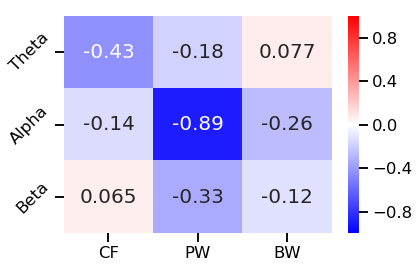

In [21]:
plot_param_ratio_corr(tar_per, tar_ap, y_labels=["Theta","Alpha","Beta" ],
                      save_fig=SAVE_FIG, file_name="Frontal_TAR_corrs")
plot_param_ratio_corr_exp(tar_ap, show=False, save_fig=SAVE_FIG, file_name="Frontal_TAR_corrs")

### Central

In [22]:
tar_per, tar_ap = param_ratio_corr(df, "TAR", ch_inds_central, func=nan_corr_spearman)
print_aperiodic_correlation("TAR", tar_ap)

The corr of TAR to Exp is 0.24
The corr of TAR to Off is 0.32
The corr of TAR to Age is -0.37


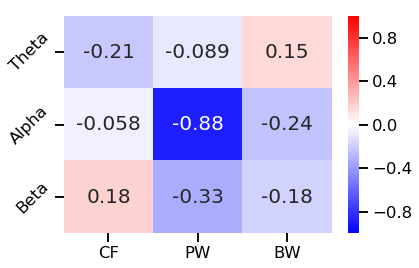

In [23]:
plot_param_ratio_corr(tar_per, tar_ap, y_labels=["Theta","Alpha","Beta" ],
                      save_fig=SAVE_FIG, file_name="Central_TAR_corrs")
plot_param_ratio_corr_exp(tar_ap, show=False, save_fig=SAVE_FIG, file_name="Central_TAR_corrs")

### Parietal

In [24]:
tar_per, tar_ap = param_ratio_corr(df, "TAR", ch_inds_parietal, func=nan_corr_spearman)

print_aperiodic_correlation("TAR", tar_ap)

The corr of TAR to Exp is 0.21
The corr of TAR to Off is 0.22
The corr of TAR to Age is -0.39


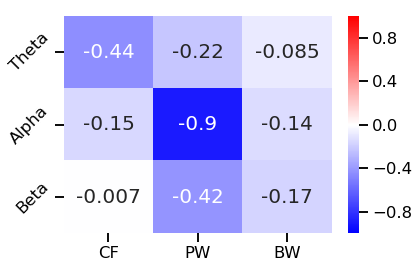

In [25]:
plot_param_ratio_corr(tar_per, tar_ap,y_labels=["Theta","Alpha","Beta" ],
                      save_fig=SAVE_FIG, file_name="Parietal_TAR_corrs")
plot_param_ratio_corr_exp(tar_ap, show=False, save_fig=SAVE_FIG, file_name="Parietal_TAR_corrs")

## ABR: Alpha Beta Ratio

### Global

In [26]:
abr_per, abr_ap = param_ratio_corr(df, "ABR", all_chans, func=nan_corr_spearman)
print_aperiodic_correlation("ABR", abr_ap)

The corr of ABR to Exp is 0.33
The corr of ABR to Off is 0.31
The corr of ABR to Age is -0.09


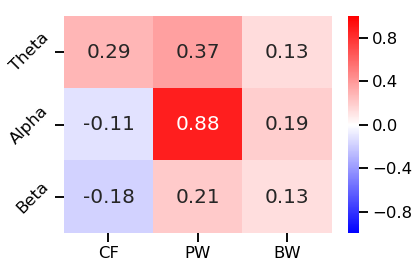

In [27]:
plot_param_ratio_corr(abr_per, abr_ap, y_labels=["Theta","Alpha","Beta" ],
                      save_fig=SAVE_FIG, file_name="Global_ABR_corrs")
plot_param_ratio_corr_exp(abr_ap, show=False, save_fig=SAVE_FIG, file_name="Global_ABR_corrs")

### Frontal

In [28]:
abr_per, abr_ap = param_ratio_corr(df, "ABR", ch_inds_frontal, func=nan_corr_spearman)
print_aperiodic_correlation("ABR", abr_ap)

The corr of ABR to Exp is 0.27
The corr of ABR to Off is 0.20
The corr of ABR to Age is -0.04


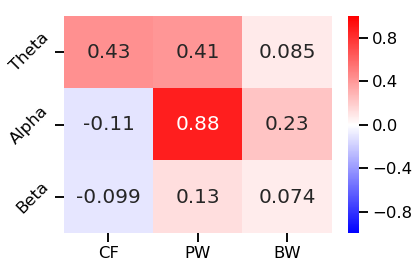

In [29]:
plot_param_ratio_corr(abr_per, abr_ap, y_labels=["Theta","Alpha","Beta" ],
                      save_fig=SAVE_FIG, file_name="Frontal_ABR_corrs")
plot_param_ratio_corr_exp(abr_ap, show=False, save_fig=SAVE_FIG, file_name="Frontal_TAR_corrs")

### Central

In [30]:
abr_per, abr_ap = param_ratio_corr(df, "ABR", ch_inds_central, func=nan_corr_spearman)
print_aperiodic_correlation("ABR", abr_ap)

The corr of ABR to Exp is 0.31
The corr of ABR to Off is 0.20
The corr of ABR to Age is -0.09


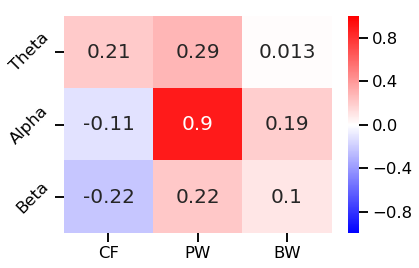

In [31]:
plot_param_ratio_corr(abr_per, abr_ap, y_labels=["Theta","Alpha","Beta" ],
                      save_fig=SAVE_FIG, file_name="Central_ABR_corrs")
plot_param_ratio_corr_exp(abr_ap, show=False, save_fig=SAVE_FIG, file_name="Central_ABR_corrs")

### Parietal

In [32]:
abr_per, abr_ap = param_ratio_corr(df, "ABR", ch_inds_parietal, func=nan_corr_spearman)
print_aperiodic_correlation("ABR", abr_ap)

The corr of ABR to Exp is 0.34
The corr of ABR to Off is 0.31
The corr of ABR to Age is -0.06


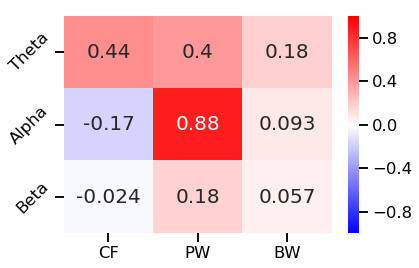

In [33]:
plot_param_ratio_corr(abr_per, abr_ap,y_labels=["Theta","Alpha","Beta" ],
                      save_fig=SAVE_FIG, file_name="Parietal_ABR_corrs")
plot_param_ratio_corr_exp(abr_ap, show=False, save_fig=SAVE_FIG, file_name="Parietal_ABR_corrs")